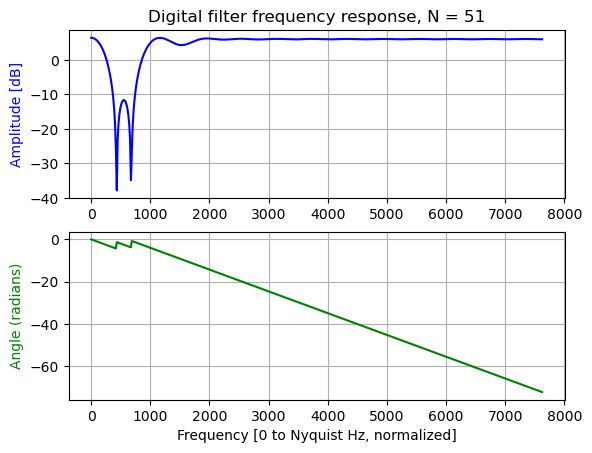

[ 0.00818079  0.00337409 -0.00273315 -0.00806911 -0.00992503 -0.00585838
  0.00533295  0.02295701  0.04439248  0.06573995  0.08295204  0.09302773
  0.09481279  0.0890945   0.07796272  0.06371523  0.04778274  0.03014962
  0.00954234 -0.01567129 -0.04624557 -0.08102528 -0.11660482 -0.14789861
 -0.16947488  1.82281603 -0.16947488 -0.14789861 -0.11660482 -0.08102528
 -0.04624557 -0.01567129  0.00954234  0.03014962  0.04778274  0.06371523
  0.07796272  0.0890945   0.09481279  0.09302773  0.08295204  0.06573995
  0.04439248  0.02295701  0.00533295 -0.00585838 -0.00992503 -0.00806911
 -0.00273315  0.00337409  0.00818079]
0.008180792539787974 ,
0.00337409314563651 ,
-0.002733153283563368 ,
-0.008069113761747742 ,
-0.009925032654075648 ,
-0.005858383893969195 ,
0.005332949456855658 ,
0.02295701199554409 ,
0.04439247663267261 ,
0.06573995310414397 ,
0.08295204381726481 ,
0.09302773220936715 ,
0.09481279237136868 ,
0.08909449838617894 ,
0.07796271909842799 ,
0.06371523254874101 ,
0.04778273918316

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Your filter design here
# firls() can be called via signal.firls()
sampeling_freq = 48*1000
#b1 = signal.firwin(10,900,window = 'hamming',fs = sampeling_freq)
#b2 = signal.firwin(10,2100,window = 'hamming',fs = sampeling_freq)
bands = [0,500,1000,2500,3000,4000,5500,24000]

b= signal.firls(51,bands,[2,2,0,0,2,2,2,2],fs=sampeling_freq)

# Signal analysis
w, h = signal.freqz(b,fs=sampeling_freq)

plt.figure()
plt.subplot(2,1,1)
plt.title('Digital filter frequency response, N = ' + str(len(b)))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')

plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
plt.plot(w / np.pi, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('Frequency [0 to Nyquist Hz, normalized]')
plt.show()
np.savetxt('B_FIR',b,delimiter=',')
print (b)
for i in range(len(b)):
    print (b[i],',')

In [2]:
##the lower tabs results in better magnitude response, and less taps means less delays, and less resource utilization, 
##In this case, with too few taps, the pass band rippel is too large to be acceptable, thus after careful tunning,
##number 45 was chosen.

In [9]:
def overflow(a,b):
    if a < b:
        return a
    else:
        return a-b

def apply_FIR(b,data_in):
    filter_len = len(b)
    data_o=[]
    buffer=[]
    #load initial data
    for i in range(0,filter_len):
        buffer.append(data_in[i])
    #start pointer
    pointer = 0
    for j in range(filter_len,len(data_in)):
        data_new = 0
        for k in range(0,filter_len):
            itr = overflow(pointer+k,filter_len)
            data_new = data_new+b[k]*buffer[itr]          
        data_o.append(data_new)
        buffer[pointer] = data_in[j]
        pointer = overflow(pointer+1,filter_len)
    return data_o     
        

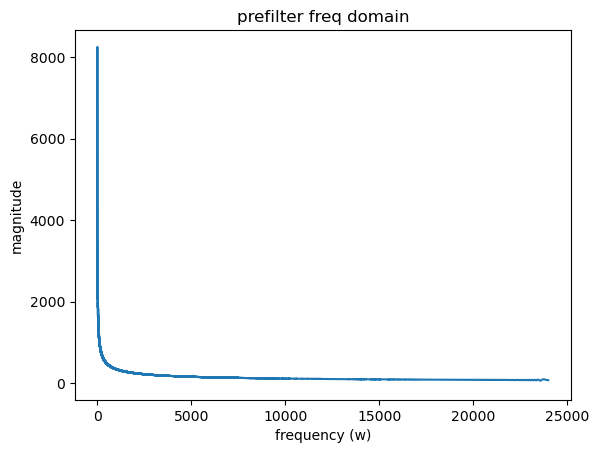

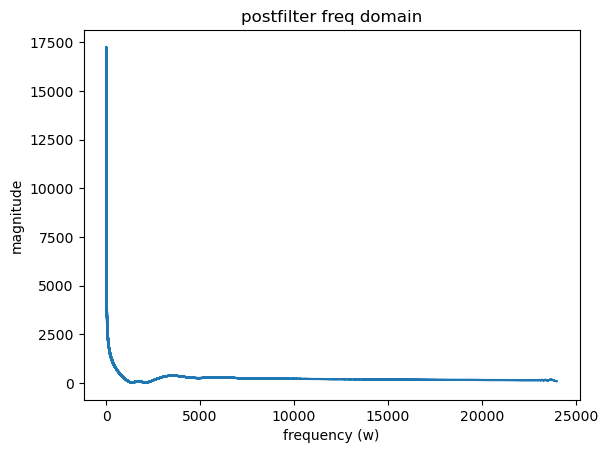

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
F_s = 48000
t = [i / F_s for i in range(2 * F_s)]
test_data = signal.chirp(t, 1, t[-1], 24000, method='logarithmic')


x = np.linspace(0,len(test_data)) 


##plt.plot(test_data,)

test_fft = np.fft.rfft(test_data)
test_freq = np.fft.fftfreq(test_fft.size,1/F_s)
test_freq1 = np.linspace(0,24000,len(test_fft))
plt.figure()
plt.title('prefilter freq domain')
plt.xlabel('frequency (w)')
plt.ylabel('magnitude')
plt.plot(test_freq1,abs(test_fft))
plt.plot(1000,0)
plt.plot(2000,0)
plt.figure()

data_out = apply_FIR(b,test_data)
data_out_fft = np.fft.fft(data_out)
data_freq = np.fft.fftfreq(data_out_fft.size,1/F_s)

plt.plot(abs(data_freq),abs(data_out_fft))
plt.title('postfilter freq domain')
plt.xlabel('frequency (w)')
plt.ylabel('magnitude')
plt.show()



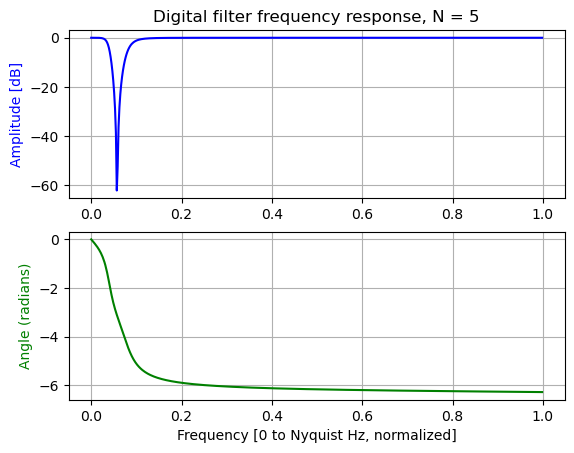

[ 0.89485861 -3.52151224  5.25424457 -3.52151224  0.89485861]
[ 1.         -3.7174862   5.24315913 -3.32553829  0.80080265]


In [10]:
sampeling_freq = 48*1000
b,a = signal.butter(2,[900,2100],'bandstop',fs = sampeling_freq)

# Signal analysis
w, h = signal.freqz(b,a)

plt.figure()
plt.subplot(2,1,1)
plt.title('Digital filter frequency response, N = ' + str(len(b)))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.grid()
plt.axis('tight')

plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
plt.plot(w / np.pi, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlabel('Frequency [0 to Nyquist Hz, normalized]')
plt.show()
print (b)
print (a)